In [1]:
import cv2
from matplotlib import pyplot as plot
import numpy as np
import imutils
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [2]:
states = {"AP": "Andhra Pradesh", "AR": "Arunachal Pradesh", "AS": "", "BR": "", "CG": "Chhattisgarh", "GA": "Goa",
          "GJ": "Gujarat", "HR": "Haryana", "HP": "Himachal Pradesh", "JH": "Jharkhand", "KA": "Karnataka",
          "KL": "Kerala", "MP": "Madhya Pradesh", "MH": "Maharashtra", "MN": "Manipur",
          "ML": "Meghalaya", "MZ": "Mizoram", "NL": "Nagaland", "OD": "Odisha", "PB": "Punjab", "RJ": "Rajasthan",
          "SK": "Sikkim", "TN": "Tamil Nadu", "TR": "Tripura", "UP": "Uttar Pradesh", "UK": "Uttarakhand",
          "WB": "West Bengal", "TS": "Telangana",
          "AN": "Andaman and Nicobar Islands", "CH": "Chandigarh", "DN": "Dadra and nagar Haveli",
          "DD": "Daman and Diu", "JK": "Jammu and Kashmir", "LA": "Ladakh", "LD": "Lakshwadweep", "DL": "Delhi",
          "PY": "Puducherry"}


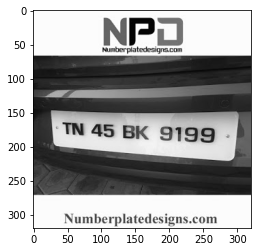

In [3]:
img = cv2.imread('images/image4px-2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plot.imshow(cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB))  #matplot only accepts rgb values

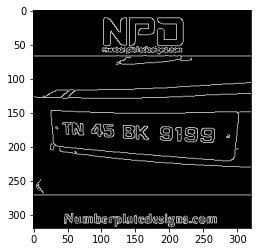

In [4]:
bfilter = cv2.bilateralFilter(gray,11,17,17)  #reducing noise
edge = cv2.Canny(bfilter, 30, 200)  #edge detection    
plot.imshow(cv2.cvtColor(edge,cv2.COLOR_GRAY2RGB))

In [5]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[ 26, 148]],

       [[298, 149]],

       [[296, 213]],

       [[ 37, 200]]], dtype=int32)

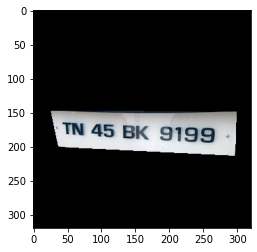

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plot.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

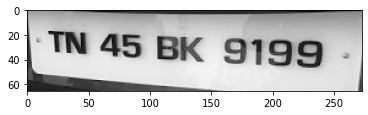

In [8]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plot.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [9]:
read = pytesseract.image_to_string(cropped_image)
read = ''.join(e for e in read if e.isalnum())  # clearing the string
stat = read[0:2]  # read the first two characters of the number plate
num = read[2:4]


In [10]:
try:
    print(read)
    print('Car belongs to', states[stat])
except:
    print('State not recognised')

TN45BK91997
Car belongs to Tamil Nadu
